# Import Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from config.defaults import cfg
from collections import deque
import json
import random
from dataset.bdd_instance_segmentation import BDDInstanceSegmentation
import matplotlib.patches as patches

# Load annotations

In [2]:
obj_cls = ['__bgr__', 'person', 'car', 'rider', 'bicycle', 'motorcycle', 'truck', 'bus']

In [3]:
%%time
bdd_train_params = {
    'cfg': cfg,
    'stage': 'train',
    'obj_cls': obj_cls
    
}
bdd_train = BDDInstanceSegmentation(**bdd_train_params)

100%|███████████████████████████████████████████████████████████████████████████| 7000/7000 [00:00<00:00, 24058.56it/s]

CPU times: total: 11.2 s
Wall time: 11.2 s


In [4]:
len(bdd_train)

5508

# Test __getitem__ 

In [22]:
idx = random.randint(0, len(bdd_train))
original_image = bdd_train.get_image(idx, False)
image, target = bdd_train[idx]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Transformed and augmented image')

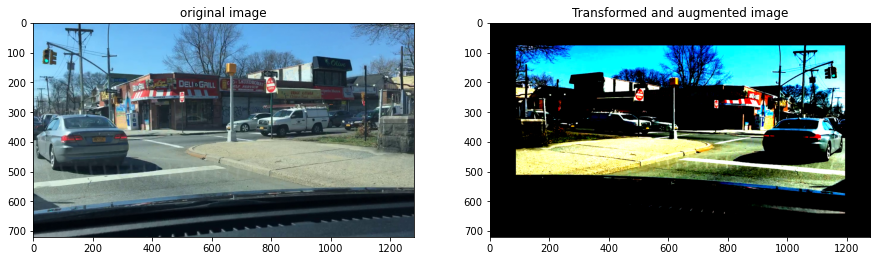

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(original_image)
ax[1].imshow(image.permute(1, 2, 0))
ax[0].set_title('original image')
ax[1].set_title('Transformed and augmented image')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


car


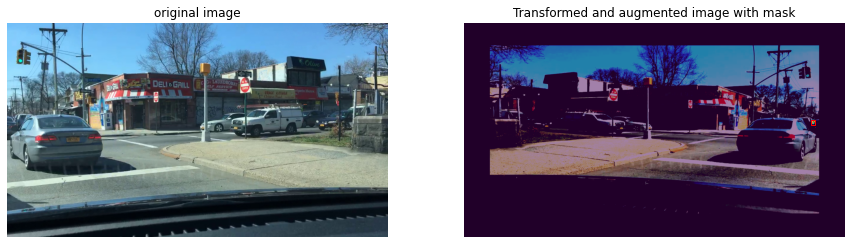

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


car


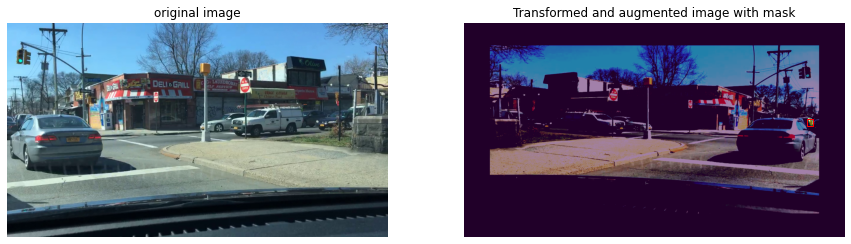

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


car


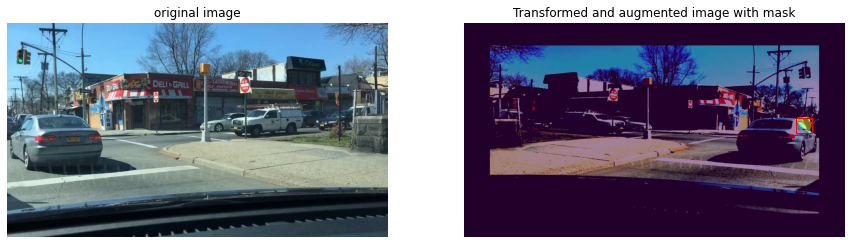

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


car


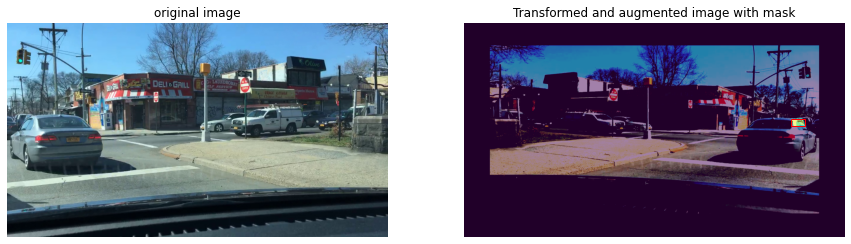

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


car


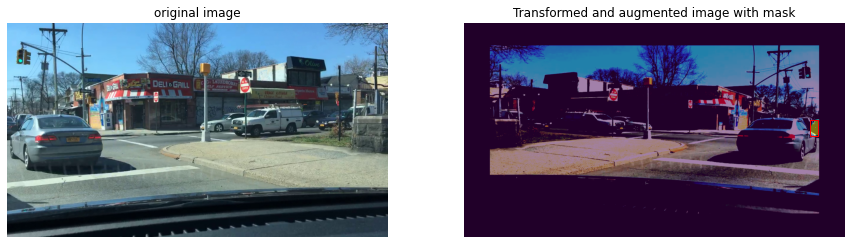

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


car


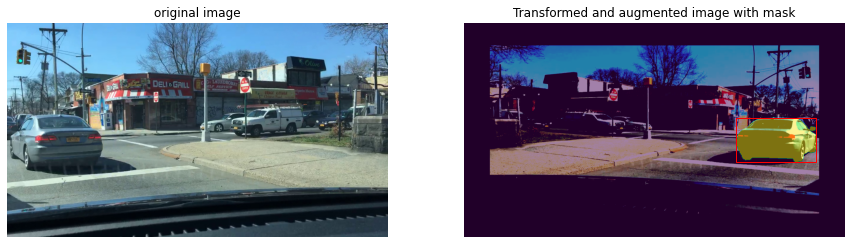

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


car


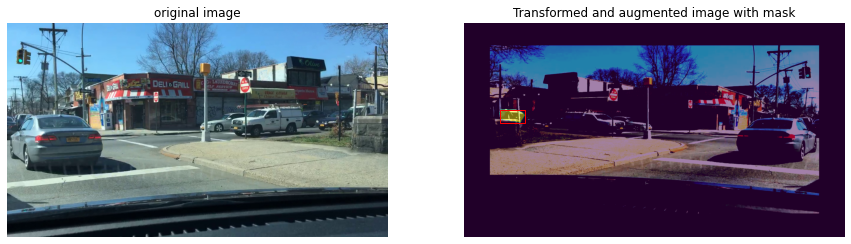

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


car


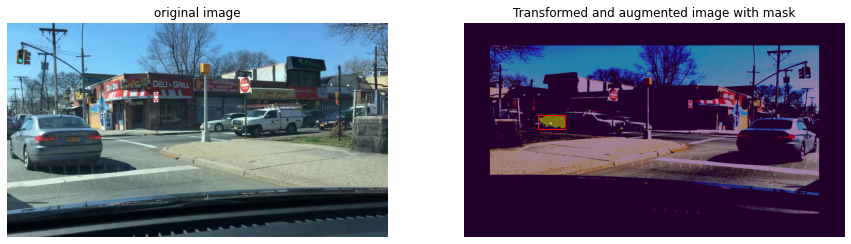

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


car


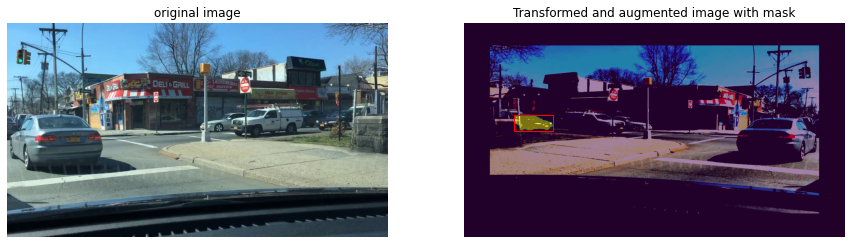

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


car


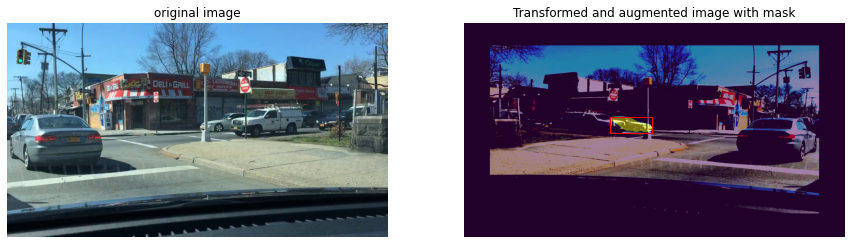

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


car


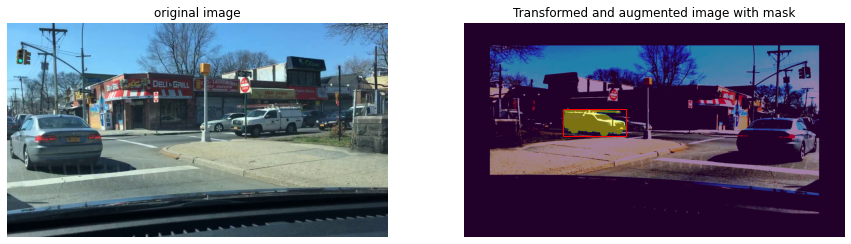

In [29]:
for i in range(0, len(target['boxes'])):
    mask = target['masks'][i]
    label = target['labels'][i]
    print(bdd_train.idx_to_cls[label.item()])
    box = target['boxes'][i]
    fig, ax = plt.subplots(1, 2, figsize=(15, 15))
    ax[0].imshow(original_image)
    ax[1].imshow(image.permute(1, 2, 0))
    rect = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                                         edgecolor='red',
                                         facecolor="none", linewidth=1)
    ax[1].add_patch(rect)
    
    ax[1].imshow(mask, alpha=0.5)
    
    ax[0].set_title('original image')
    ax[1].set_title('Transformed and augmented image with mask')
    
    ax[0].axis('off')
    ax[1].axis('off')
    #ax[2].axis('off')
    plt.show()

# Test Display Method

In [15]:
idx = random.randint(0, len(bdd_train))
image = bdd_train.get_image(idx, False)
target = bdd_train._get_labels(idx)

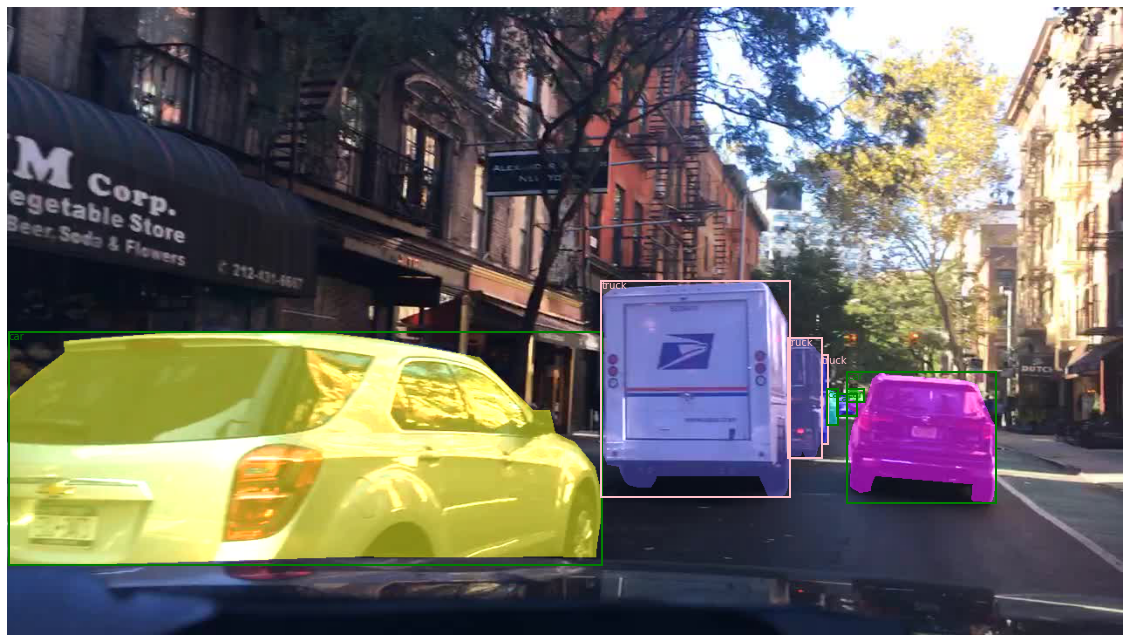

In [16]:
bdd_train.display_image(image, target['masks'], target['boxes'], target['labels'])

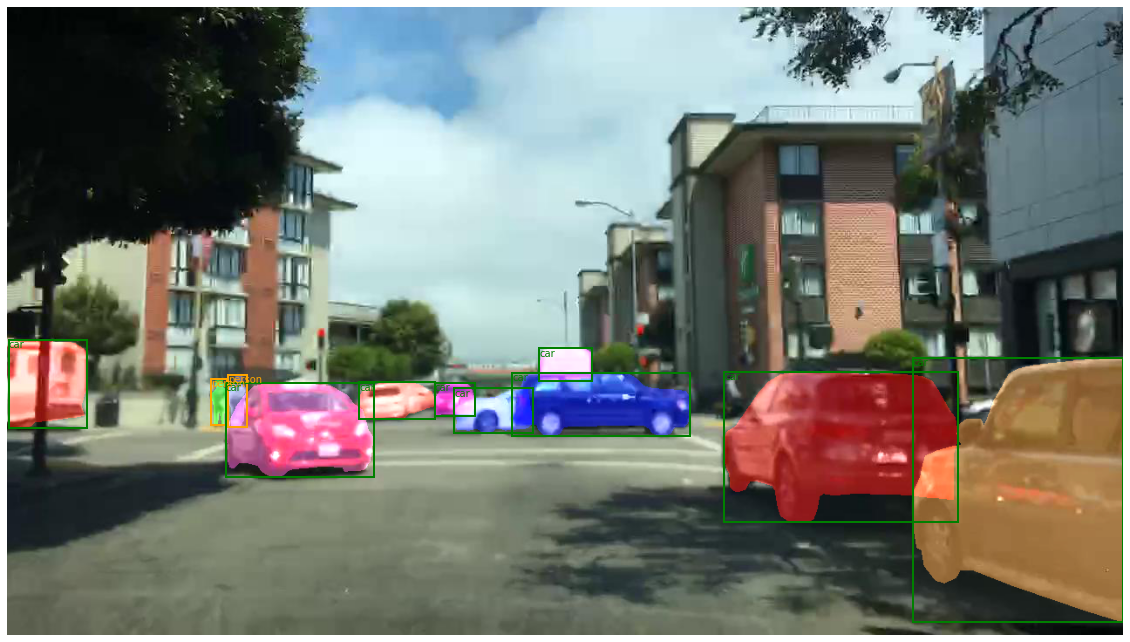

In [17]:
idx = random.randint(0, len(bdd_train))
image = bdd_train.get_image(idx, False)
target = bdd_train._get_labels(idx)

bdd_train.display_image(image, target['masks'], target['boxes'], target['labels'])

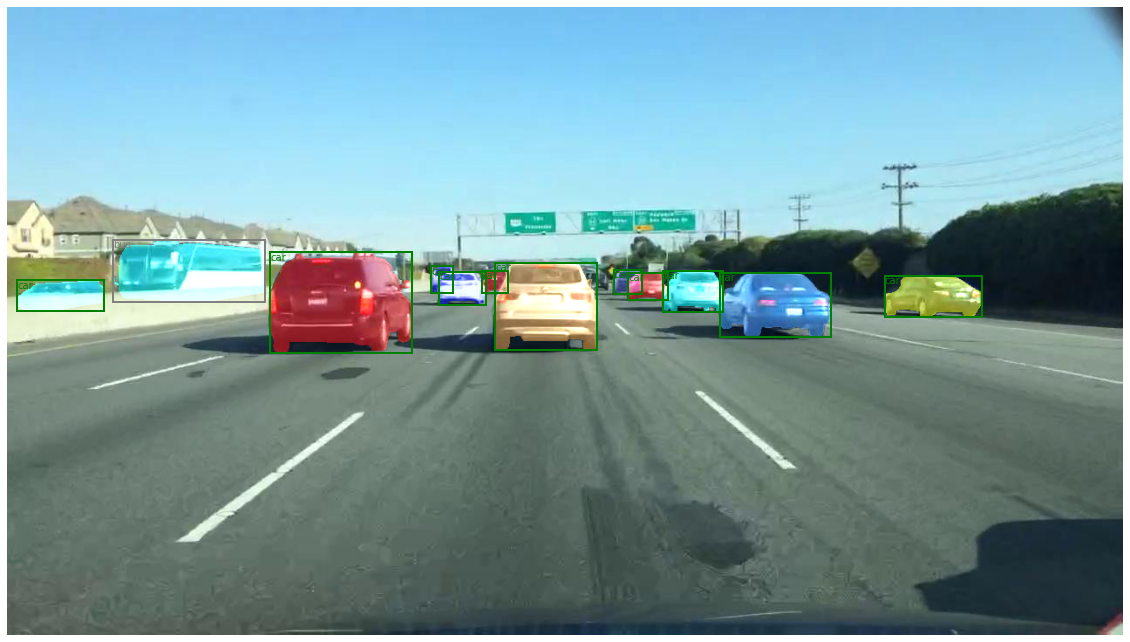

In [18]:
idx = random.randint(0, len(bdd_train))
image = bdd_train.get_image(idx, False)
target = bdd_train._get_labels(idx)

bdd_train.display_image(image, target['masks'], target['boxes'], target['labels'])